<a href="https://www.kaggle.com/code/mubasherbajwa/complete-guide-to-twitter-sentiment-analysis-nlp?scriptVersionId=191610288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="0"></a>
 <center><img src='https://i.imgur.com/MSRc2v3.jpg' 
     height=150px width=1150px /></center> 
     
<div style="border-radius:10px; padding: 12px; background-color: #f2f6fc; font-size:100%; text-align:left">

# Sentiment Analysis
Sentiment analysis is the automatic process of classifying text data according to their polarity, such as positive, negative and neutral. Companies leverage sentiment analysis of tweets to get a sense of how customers are talking about their products and services, get insights to drive business decisions, and identify product issues and potential PR crises early on.
In this guide, I will cover everything you need to learn to get started with sentiment analysis on Twitter. I'll share a step-by-step process to do sentiment analysis.

# Problem Statement
Twitter is an online Social Media Platform where people share their their though as tweets. It is observed that some people misuse it to tweet hateful content. Twitter is trying to tackle this problem and we shall help it by creating a strong NLP based-classifier model to distinguish the negative tweets & block such tweets. Can you build a strong classifier model to predict the same?

**"My ridiculous dog is amazing." [sentiment: positive]**

With all of the tweets circulating every second it is hard to tell whether the sentiment behind a specific tweet will impact a company, or a person's, brand for being viral (positive), or devastate profit because it strikes a negative tone. Capturing sentiment in language is important in these times where decisions and reactions are created and updated in seconds. But, which words actually lead to the sentiment description? In this notebook we will need to pick out the part of the tweet (word or phrase) that reflects the sentiment.

In [1]:
# Install all necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and text handling
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Warnings
import warnings
warnings.filterwarnings('ignore')

# About the Dataset
Each row contains the text of a tweet and a sentiment label. In the training set you are provided with a word or phrase drawn from the tweet (selected_text) that encapsulates the provided sentiment.
**The dataset has 27.5k tweets labelled according to their sentiment.**
Each row contains the text of a tweet and a sentiment label. In the training set you are provided with a word or phrase drawn from the tweet (selected_text) that encapsulates the provided sentiment.

### Columns
* `textID` - unique ID for each piece of text
* `text` - the text of the tweet
* `sentiment` - the general sentiment of the tweet
* `selected_text` - [train only] the text that supports the tweet's sentiment

In [2]:
# Load in the dataset
df= pd.read_csv('/kaggle/input/twitter-tweets-sentiment-dataset/Tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


# Exploratory Data Analysis

In [3]:
# Check the shape
print(df.shape)

(27481, 4)


In [4]:
# Check for missing values and drop them
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64
textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


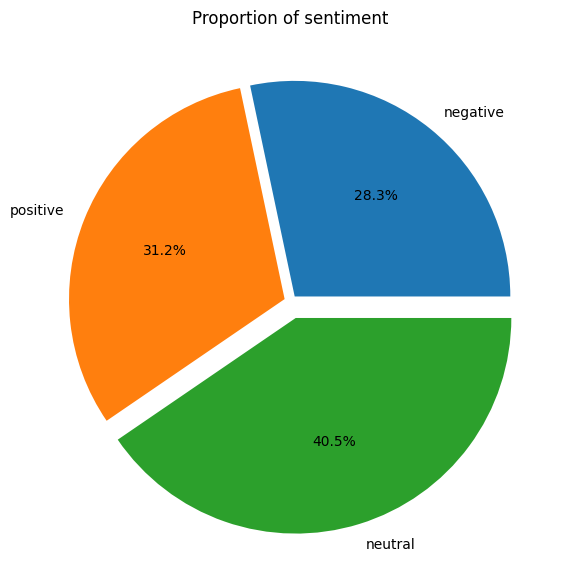

In [5]:
# check the proportion of each sentiment
x = df.sentiment.value_counts().sort_values()

plt.figure(figsize=(7, 7))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Proportion of sentiment')

plt.show()

# Word Cloud
A word cloud is a visual representation of text data which is often used to depict keyword metadata on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color. These visualizations help highlight important or frequently occurring terms within a given context. Businesses often use word clouds to analyze customer feedback, employee opinions, SEO keywords, and more.

Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot **Word Clouds** for **Positive, Negative and Neutral** tweets from our dataset and see which words occur the most.

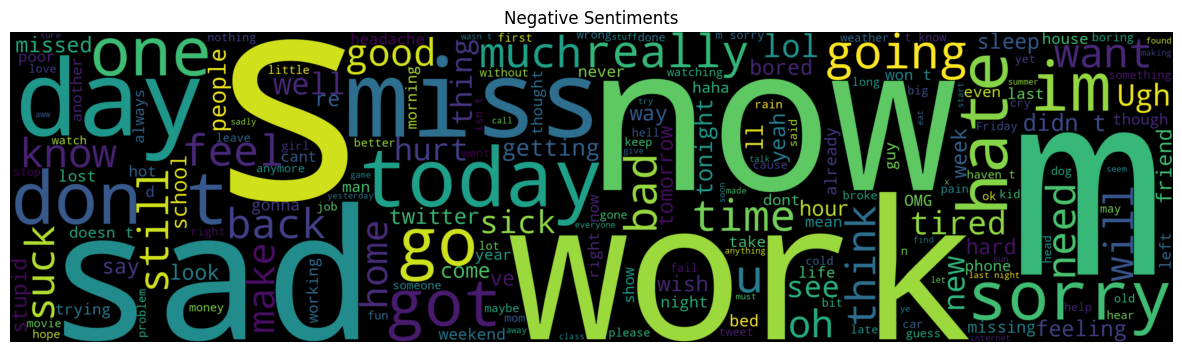

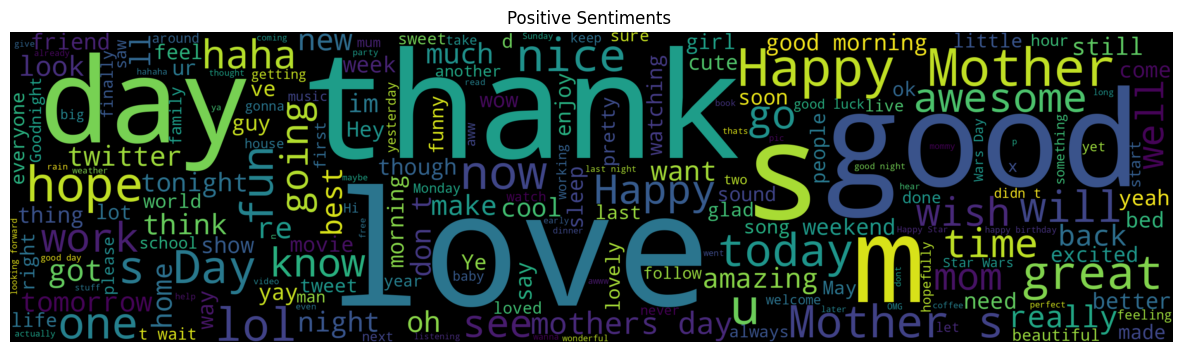

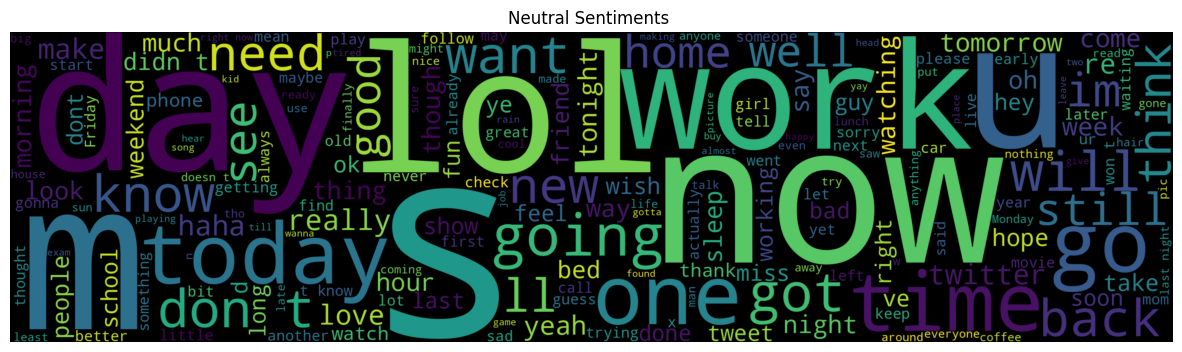

In [6]:
from wordcloud import WordCloud, STOPWORDS
negative_df = df[df['sentiment'] == 'negative']
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']

# Define a function to generate and display a WordCloud
def generate_wordcloud(data, title):
    words = ' '.join(data['text'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT' ])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black', 
                          width=3000, height=800).generate(cleaned_word)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Generate and display WordClouds for each sentiment category
generate_wordcloud(negative_df, 'Negative Sentiments')
generate_wordcloud(positive_df, 'Positive Sentiments ')
generate_wordcloud(neutral_df, 'Neutral Sentiments ')

# Pre-processing
Raw text data is often noisy and unstructured, containing various inconsistencies such as typos, slang, abbreviations, and irrelevant information. Preprocessing helps in:
* **Improving Data Quality**: Removing noise and irrelevant information ensures that the data fed into the model is clean and consistent.
* **Enhancing Model Performance**: Well-preprocessed text can lead to better feature extraction, improving the performance of NLP models.
* **Reducing Complexity**: Simplifying the text data can reduce the computational complexity and make the models more efficient.

Preprocessing steps in Natural Language Processing (NLP) include:
* **Punctuation Mark Removal:**
Eliminate punctuation marks (e.g., commas, periods, exclamation points) from the text. Given the sentence: “Hello, world! This is an example.” After punctuation removal, it becomes: “Hello world This is an example.”

* **Tokenization:** Break down text into smaller units (tokens), such as words or sentences. Given the sentence: “Natural language processing is fascinating,” tokenization produces individual words: [“Natural”, “language”, “processing”, “is”, “fascinating”].
* **Stop Word Removal:** Eliminate common words (stopwords) that don’t carry significant meaning. For example, stopwords like “the,” “and,” and “is” are removed from a sentence: “The cat is on the mat.”
* **Stemming:** Reduce words to their base or root forms (e.g., “running” → “run”). For instance, “Running dogs are faster” becomes “run dog are faster.”
* **Lemmatization:** Map words to their dictionary forms (e.g., “better” → “good”). For example, “Better cats are happier” becomes “good cat be happy.”
* **Parts of Speech (POS) Tagging:** Label each word in a sentence with its corresponding part of speech (e.g., noun, verb, adjective). For the sentence “The cat chased the mouse,” POS tagging assigns labels: “The/determiner cat/noun chased/verb the/determiner mouse/noun.”

In [7]:
# Define a function to clean and preprocess the text
def preprocess_text(text):
    # Remove HTML tags and URLs
    text = re.sub(r'<.*?>|http\S+', '', text)
    # Convert text to lower case
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply preprocessing function to text column
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [8]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"i`d respond , go"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego ! ! !
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bulli ...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview ! leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"son **** , couldn`t put releas alreadi bought"


# TF-IDF Vectorization
In the realm of Natural Language Processing (NLP), transforming text into numerical representations is essential for various tasks. TF-IDF vectorization stands out as a powerful technique for this purpose. 
TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a method to represent text documents as numerical vectors. It measures the importance of a term within a document relative to the entire corpus. Let's break it down with a step-by-step example:

## Example Corpus:
Consider a small corpus with three documents:

* Document 1: "I love eating apples."
* Document 2: "Apples are delicious fruits."
* Document 3: "Bananas and oranges are also tasty."

### Step 1: Calculate Term Frequency (TF)
Term Frequency (TF) measures how often a term appears in a document relative to the total number of terms in that document.

$$ \text{TF} = \frac{\text{Frequency of the word in the sentence}}{\text{Total number of words in the sentence}} $$

For instance, let's calculate TF for the term "apples" in Document 1:

* Number of times "apples" appears in Document 1 = 1
* Total number of terms in Document 1 (excluding stop words) = 4
* TF("apples", Document 1) = 1 / 4 = 0.25

Similarly, compute TF for all terms in each document.

### Step 2: Calculate Inverse Document Frequency (IDF)
Inverse Document Frequency (IDF) measures the rarity of a term across the entire corpus. It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term.

$$ \text{IDF} = \frac{\text{Total number of sentences (documents)}}{\text{Number of sentences (documents) containing the word}} $$

For example, let's calculate IDF for the term "apples":

* Total number of documents in the corpus = 3
* Number of documents containing the term "apples" = 2
* IDF("apples") = log(3 / 2) ≈ 0.176

Calculate IDF for all terms in the corpus.

### Step 3: Compute TF-IDF
TF-IDF is obtained by multiplying TF by IDF for each term in each document.

For "apples" in Document 1:

* TF-IDF("apples", Document 1) = TF("apples", Document 1) * IDF("apples") = 0.25 * 0.176 ≈ 0.044

Similarly, calculate TF-IDF for all terms in each document.

Each row represents a term, and each column represents a document. The values are the TF-IDF scores for each term in each document.

Document 1 can be represented as [0.044,0,0,0.176,0,0.176,0,0,0]

## Advantages of TF-IDF:
1. Term Importance: TF-IDF emphasizes terms that are both frequent in a document and rare across the corpus, highlighting their significance in representing the content.
2. Versatility: TF-IDF can be applied to various NLP tasks such as document classification, information retrieval, and keyword extraction, making it a versatile technique.
3. Language Independence: TF-IDF does not rely on linguistic rules or language-specific features, making it applicable across different languages and domains.
4. Simple Calculation: TF-IDF scores are straightforward to compute, involving basic arithmetic operations (TF and IDF calculations) applied to each term in each document.

## Disadvantages of TF-IDF:
1. Sparse Representation: TF-IDF matrices tend to be sparse, especially in large corpora with many unique terms, which can lead to storage and computational overhead.
2. Lack of Semantic Understanding: TF-IDF does not consider the semantic relationships between terms, potentially leading to limitations in understanding context and meaning.
3. Sensitivity to Vocabulary: TF-IDF is sensitive to the choice of vocabulary and may not perform well with out-of-vocabulary terms or rare words.
4. Normalization Issues: TF-IDF scores may need to be normalized to account for document length variations, which can impact the effectiveness of the technique.

## Applications of TF-IDF Vectorization
TF-IDF vectorization finds extensive applications across various NLP tasks:
1. **Document Classification**: TF-IDF vectors serve as features for training classifiers to categorize documents into predefined classes.
2. **Information Retrieval**: Search engines utilize TF-IDF to rank documents based on their relevance to user queries.
3. **Keyword Extraction**: TF-IDF aids in identifying important keywords within documents for summarization and content analysis.

In [9]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['text'])

# Train ~ Test Split

In [10]:
# Split the data into training and test sets for the Logistic Regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, df['sentiment'], test_size=0.2, random_state=42)

# Machine Learning Models
We will use the Logistic Regression, Support Vector Machine, Random Forest Classifier, Gradient Boosting  Classifier for sentiment analysis of the given dataset.

In [11]:
# Importing & calling Machine learning models

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=42)

In [12]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
models = [lr_model, svc, rfc, GB]
accuracy_scores = []

# training models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test,y_pred)
    accuracy_scores.append(acc)
    
    print(model)
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print()

LogisticRegression()
Accuracy Score: 0.6864992721979621

SVC()
Accuracy Score: 0.6870451237263464

RandomForestClassifier()
Accuracy Score: 0.6812227074235808

GradientBoostingClassifier(random_state=42)
Accuracy Score: 0.6442867540029112



# Model Comparison

Text(0.5, 1.0, 'Model Comparison')

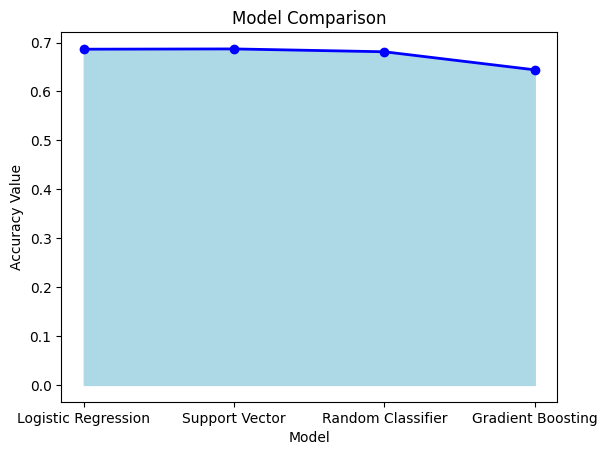

In [13]:
models = ['Logistic Regression', 'Support Vector', 'Random Classifier', 'Gradient Boosting']
plt.plot(models, accuracy_scores, label='Accuracy Score', marker='o', linestyle='-', color='b', linewidth=2)
plt.fill_between(models, accuracy_scores, color='lightblue', alpha=1)
plt.xlabel('Model')
plt.ylabel('Accuracy Value')
plt.title('Model Comparison')

****

Among the four models evaluated, the Logistic Regression and Support Vector Classifier model demonstrated the best overall performance with an accuracy of about 69%. Though, the values of accuracy is not so much appreciable but it somehow distinguished between negative, neutral, and positive sentiments, making it the starting choice for sentiment analysis of Twitter tweets as useful baselines. These models can be fine-tuned to unlock the advanced capabilities in understanding contextual nuances and capturing the complexities of language make them the superior choices. This notebook successfully developed and evaluated multiple machine learning models for sentiment analysis, providing valuable insights into public sentiment expressed in tweets and highlighting the effectiveness of these models in such tasks.

# Confusion Matrix

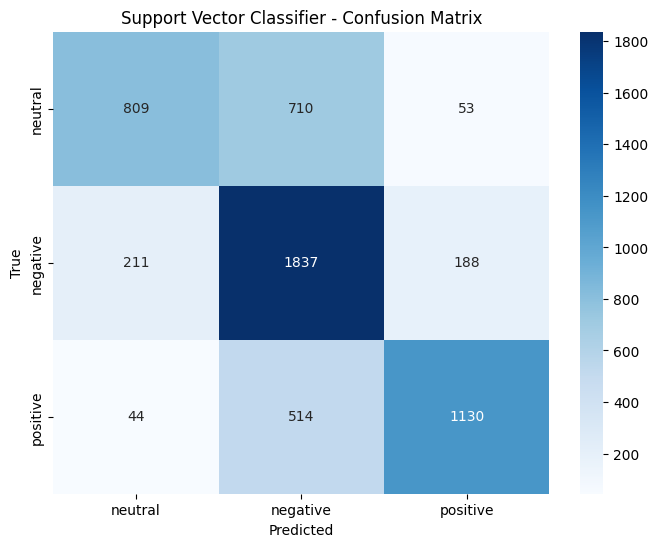

In [14]:
# Generate and plot the confusion matrix for Support Vector Classifier
y_pred = svc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['sentiment'].unique(), yticklabels=df['sentiment'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Support Vector Classifier - Confusion Matrix')
plt.show()

## Inference from Confusion Matrix
**Support Vector Classifier Confusion Matrix**

* The model correctly classified 809 neutral instances, but misclassified 710 as negative and 53 as positive.
* For the negative class, it correctly identified 1,837 instances, while misclassifying 211 as neutral and 188 as positive.
* In the positive class, the model accurately predicted 1,130 instances but misclassified 514 as negative and 44 as neutral.

* This indicates that the model is particularly strong at identifying negative sentiments, shown by the high number of correct predictions (1,703) for this class.
* However, it struggles more with distinguishing neutral and positive sentiments, leading to notable misclassifications between these categories. The overall performance shows a need for improvement in differentiating closely related sentiments, particularly between neutral and negative classes.

# Classification Report
In the classification report, we can see things like accuracy, which tells us overall how often our model is correct. We also see precision, recall, and F1 Score, which give us insights into how well our model is doing at correctly identifying different classes (like negative, postive and neutral sentiment in our case). It's a performance evaluation metric commonly used in supervised machine learning tasks, especially for classification problems. Let me break it down for you:

1. **Precision**: This metric measures how many of the positive predictions made by the model are actually correct. It's calculated as the ratio of true positives (correctly predicted positive samples) to the sum of true positives and false positives (incorrectly predicted positive samples).

2. **Recall (Sensitivity)**: Recall tells us how many of the actual positive samples were correctly predicted by the model. It's calculated as the ratio of true positives to the sum of true positives and false negatives (actual positive samples missed by the model).

3. **F1-Score**: The F1-score is the harmonic mean of precision and recall. It balances both metrics and provides a single value that represents the overall performance of the model.

4. **Support**: Support indicates the number of samples in each class.

We can generate a classification report using libraries like scikit-learn in Python using the `classification_report()`

In [15]:
print("Classification Report for Support Vector Classifier:\n", classification_report(y_test, y_pred, target_names=df['sentiment'].unique()))

Classification Report for Support Vector Classifier:
               precision    recall  f1-score   support

     neutral       0.76      0.51      0.61      1572
    negative       0.60      0.82      0.69      2236
    positive       0.82      0.67      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.73      0.67      0.68      5496
weighted avg       0.71      0.69      0.68      5496



**Support Vector Classifier Classification Report**

* The model's precision, recall, and F1-score for the neutral class are 0.76, 0.51, and 0.61, respectively, indicating that while it is relatively precise in identifying neutral tweets, it misses a significant portion of them, as reflected in the lower recall. 
* For the negative class, the precision is 0.60, recall is 0.82, and F1-score is 0.69, suggesting that the model is more effective in capturing negative tweets, but it also includes more false positives.
* The positive class shows a precision of 0.82, recall of 0.67, and F1-score of 0.74, demonstrating that the model performs fairly well in identifying positive tweets, although there is still room for improvement.

* The model achieves an accuracy of 69%, with the macro average (average of precision, recall, and F1-score for all classes) being 0.73 for precision, 0.67 for recall, and 0.68 for F1-score. 
* The weighted average, which takes into account the support (number of true instances for each class), is slightly lower, indicating that the model's performance is reasonably consistent across different classes but has a slight bias towards the negative class due to its higher support.
* These metrics suggest that while the model is moderately effective, there is potential for enhancing its precision and recall, particularly for the neutral and positive classes, to improve overall performance.

# Test Your Own Tweet

In [16]:
text = ["I hate twitter"]
sentiment = lr_model.predict(tfidf_vectorizer.transform(text))
print(sentiment)

['negative']


In [17]:
text = ["Weather is too awsome today"]
sentiment = lr_model.predict(tfidf_vectorizer.transform(text))
print(sentiment)

['positive']


# Conclusion

In this guide, I have covered almost everything you need to learn to get started with sentiment analysis on Twitter. I have used the Logistic Regression, Support Vector Machine, Random Forest Classifier, Gradient Boosting  Classifier for sentiment analysis of the given dataset. We have created a strong NLP based-classifier model to distinguish the negative tweets & block such tweets. Though, the values of accuracy is not so much appreciable but it somehow distinguished between negative, neutral, and positive sentiments, making it the starting choice for sentiment analysis of Twitter tweets as useful baselines. These models can be fine-tuned to unlock the advanced capabilities in understanding contextual nuances and capturing the complexities of language make them the superior choices. This notebook successfully developed and evaluated multiple machine learning models for sentiment analysis, providing valuable insights into public sentiment expressed in tweets and highlighting the effectiveness of these models in such tasks.

### **Your feedback means a lot to me!**

### * **Please feel free to share your valueable input or suggestions so that I could be able to code even better.**
### * **Please Upvote if you find this notebook useful for newbies entering into the overwhelming world of AI. Thank you! 🍀**

<center><img src='https://media2.giphy.com/media/v6LmZUEsXHacGsD4UT/giphy.gif?cid=ecf05e47r1kim8nb14w26tojy5m92yohv2imfouetc9gq8v9&rid=giphy.gif&ct=s' height=200px width=300px></center>